In [1]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPool2D, BatchNormalization, Conv2D, Flatten, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
import numpy as np
%matplotlib inline

In [2]:
print(np.shape(mnist.load_data()))

(2, 2)


In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [4]:
print(type(X_train))
print(X_train.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)


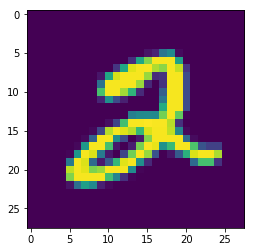

In [5]:
plt.figure()
plt.imshow(X_train[5])

In [6]:
y_train[5]

2

In [7]:
y_train = tf.one_hot(y_train,depth=10)
sess = tf.Session()
with sess.as_default():
    y_train = y_train.eval()
y_test = tf.one_hot(y_test,depth=10)

X_train = X_train.reshape(60000,-1)
X_train = X_train/255
print(X_train.shape)

(60000, 784)


In [8]:
print(y_train[0])
type(y_train)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


numpy.ndarray

In [9]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(784,), kernel_initializer='normal'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer=tf.train.AdamOptimizer(.002), loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(X_train, y_train, epochs = 3, batch_size = 50)

Epoch 1/3
60000/60000 [==============================] - 21s 347us/step - loss: 0.4036 - acc: 0.8838
Epoch 2/3
60000/60000 [==============================] - 16s 273us/step - loss: 0.2322 - acc: 0.9338
Epoch 3/3
60000/60000 [==============================] - 12s 204us/step - loss: 0.2055 - acc: 0.9403


In [13]:
X_test= X_test.reshape(10000,-1)
X_test = X_test /255
sess = tf.Session()
with sess.as_default():
    y_test = y_test.eval()
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 140us/step


[0.20913877561986446, 0.942]

In [17]:
model2 = Sequential()
model2.add(Dense(784, input_shape=(784,), kernel_initializer = 'normal', activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(optimizer = tf.train.AdamOptimizer(.002), loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train,y_train, epochs =3, batch_size=50)

Epoch 1/3
60000/60000 [==============================] - 41s 676us/step - loss: 0.1816 - acc: 0.9452
Epoch 2/3
60000/60000 [==============================] - 36s 599us/step - loss: 0.0766 - acc: 0.9762
Epoch 3/3
60000/60000 [==============================] - 38s 627us/step - loss: 0.0521 - acc: 0.9832


In [18]:
model2.evaluate(X_test,y_test)

10000/10000 [==============================] - 2s 157us/step


[0.08166970599591732, 0.9746]